<a href="https://colab.research.google.com/github/EricStimpsonWSU/ModernLab/blob/main/ChaoticPendulum/notebooks/LowDampPoincare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#imports
import pandas as pd
import numpy as np

In [3]:
url = "https://raw.githubusercontent.com/EricStimpsonWSU/ModernLab/main/ChaoticPendulum/data/chaotic_motion_lowdamp.csv"
raw = pd.read_csv(url)

In [5]:
raw[raw["State Run #10"] == 1.0]

,Date and Time Run #10,Time (s) Run #10,Counts/sample (counts/sample) Run #10,Angle (rad) Run #10,Angular Velocity (rad/s) Run #10,Angular Acceleration (rad/s²) Run #10,Position (m) Run #10,Velocity (m/s) Run #10,Acceleration (m/s²) Run #10,Counts Run #10,State Run #10,Time in Gate (s) Run #10,Speed (m/s) Run #10
16,01/27/2023 02:31:31 pm,0.793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
45,01/27/2023 02:31:33 pm,2.101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
73,01/27/2023 02:31:34 pm,3.406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
101,01/27/2023 02:31:35 pm,4.711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
129,01/27/2023 02:31:37 pm,6.008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41178,01/27/2023 03:03:21 pm,1910.761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
41205,01/27/2023 03:03:23 pm,1912.037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
41233,01/27/2023 03:03:24 pm,1913.301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
41260,01/27/2023 03:03:25 pm,1914.566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [11]:
exp = raw.iloc[16:].rename(columns={"Time (s) Run #10": "Time", "Angle (rad) Run #10": "Theta", "Angular Velocity (rad/s) Run #10": "Omega", "Angular Acceleration (rad/s²) Run #10": "OmegaDot", "State Run #10": "State"}).filter(items=["Time", "Theta", "Omega", "OmegaDot", "State"])
exp["Phi"] = 0.0
exp["PoincareSet"]= 0



In [12]:
gateTriggers = exp[exp["State"] == 1.0].shape[0]
minTime = exp[exp["State"] == 1.0].Time.min()
maxTime = exp[exp["State"] == 1.0].Time.max()
elapsedTime = maxTime - minTime
avgTime = elapsedTime/(gateTriggers - 1)
phiDot = 2. * np.pi / avgTime
[gateTriggers, minTime, maxTime, elapsedTime, avgTime, phiDot]

[1488, 0.793, 1915.847, 1915.054, 1.28786415601883, 4.878764020114338]

In [15]:
cycleStartTime = 0
poincareSet = 0
for row in exp.itertuples():
  if row.State == 1:
    cycleStartTime = row.Time
    poincareSet = 0
  elapsedTime = row.Time - cycleStartTime
  exp.at[row.Index, "Phi"] = phiDot * elapsedTime
  exp.at[row.Index, "PoincareSet"] = poincareSet
  poincareSet += 1


In [25]:
exp

,Time,Theta,Omega,OmegaDot,State,Phi,PoincareSet
16,0.793,NaN,NaN,NaN,1.0,0.000000,0
17,0.800,-1.763,0.698,14.738,NaN,0.034151,1
18,0.850,-1.710,1.454,15.708,NaN,0.278090,2
19,0.851,NaN,NaN,NaN,0.0,0.282968,3
20,0.900,-1.623,2.269,16.678,NaN,0.522028,4
...,...,...,...,...,...,...,...
41289,1915.900,-1.187,0.756,12.799,NaN,0.258574,2
41290,1915.904,NaN,NaN,NaN,0.0,0.278090,3
41291,1915.950,-1.134,1.396,NaN,NaN,0.502513,4
41292,1916.000,-1.047,2.094,NaN,NaN,0.746451,5


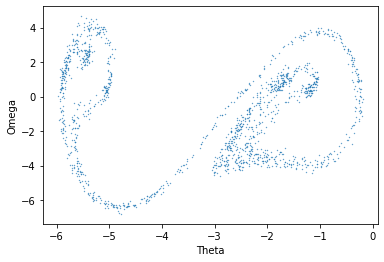

In [31]:
exp[exp.PoincareSet==1].plot(kind="scatter", x="Theta", y="Omega", s=0.1)

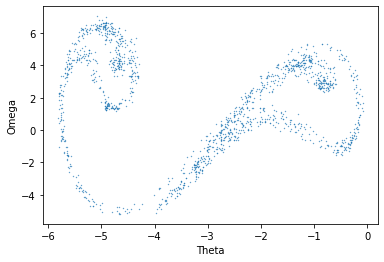

In [32]:
exp[exp.PoincareSet==6].plot(kind="scatter", x="Theta", y="Omega", s=0.1)

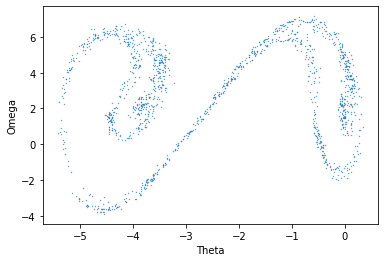

In [33]:
exp[exp.PoincareSet==11].plot(kind="scatter", x="Theta", y="Omega", s=0.1)

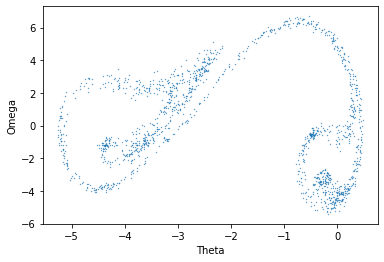

In [34]:
exp[exp.PoincareSet==16].plot(kind="scatter", x="Theta", y="Omega", s=0.1)

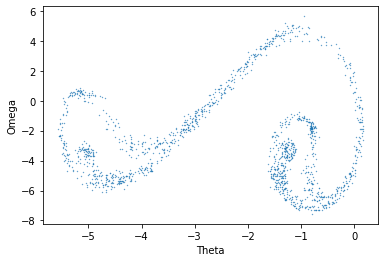

In [35]:
exp[exp.PoincareSet==21].plot(kind="scatter", x="Theta", y="Omega", s=0.1)